# <font color=darkblue> Machine Learning model deployment with Flask framework on Heroku</font>

## <font color=Blue>Used Cars Price Prediction Application</font>

### Objective:
1. To build a Machine learning regression model to predict the selling price of the used cars based on the different input features like fuel_type, kms_driven, type of transmission etc.
2. Deploy the machine learning model with flask framework on heroku.

### Dataset Information:
#### Dataset Source: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=CAR+DETAILS+FROM+CAR+DEKHO.csv
This dataset contains information about used cars listed on www.cardekho.com
- **Car_Name**: Name of the car
- **Year**: Year of Purchase
- **Selling Price (target)**: Selling price of the car in lakhs
- **Present Price**: Present price of the car in lakhs
- **Kms_Driven**: kilometers driven
- **Fuel_Type**: Petrol/diesel/CNG
- **Seller_Type**: Dealer or Indiviual
- **Transmission**: Manual or Automatic
- **Owner**: first, second or third owner


### 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

### 2. Load the dataset

In [2]:
# Read and load the dataset
df = pd.read_csv('car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### 3. Check the shape and basic information of the dataset.

In [3]:
## check the shape 
df.shape

(301, 9)

In [4]:
## check basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### 4. Check for the presence of the duplicate records in the dataset? If present drop them

In [5]:
## Finding the duplicate records
len(df[df.duplicated()])

2

In [6]:
## dropping duplicates
df.drop_duplicates(inplace=True)

In [7]:
## Checking if the duplicate records got removed or not
len(df[df.duplicated()])

0

### 5. Drop the columns which you think redundant for the analysis.

In [8]:
## dropping redundant columns
df.drop(['Car_Name'],axis=1,inplace=True)

### 6. Extract a new feature called 'age_of_the_car' from the feature 'year' and drop the feature year

In [9]:
df['Age_of_the_car'] = 2022 - df['Year']

In [10]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_the_car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [11]:
## dropping Year column
df.drop('Year',axis=1,inplace=True)

In [12]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_the_car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


### 7. Encode the categorical columns

In [13]:
## Label Encoding categorical variables "Fuel_Type", "Seller_Type", and "Transmission" using label encoder

## select object datatype variables
object_type_variables = [i for i in df[["Fuel_Type", "Seller_Type", "Transmission"]] if df.dtypes[i] == object]
object_type_variables 


le = LabelEncoder()

def encoder(df):
    for i in object_type_variables:
        q = le.fit_transform(df[i].astype(str))  
        df[i] = q                               
        df[i] = df[i].astype(int)
encoder(df)

In [14]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_the_car
0,3.35,5.59,27000,2,0,1,0,8
1,4.75,9.54,43000,1,0,1,0,9
2,7.25,9.85,6900,2,0,1,0,5
3,2.85,4.15,5200,2,0,1,0,11
4,4.60,6.87,42450,1,0,1,0,8


### 8. Separate the target and independent features.

In [15]:
## separate target and independent variables
X = df.drop('Selling_Price',axis=1)
y = df['Selling_Price']

### 9. Split the data into train and test.

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(209, 7) (90, 7)
(209,) (90,)


### 10. Build a Random forest Regressor model and check the r2-score for train and test.

In [17]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor()
model_RFR.fit(X_train, y_train)
print(); 
print(model_RFR)


RandomForestRegressor()


In [18]:
expected_y  = y_test
predicted_y = model_RFR.predict(X_test)

In [19]:
print('r2 score: ',metrics.r2_score(expected_y, predicted_y)*100)
print('mean squared log error: ',metrics.mean_squared_log_error(expected_y, predicted_y)*100)

r2 score:  89.61262202210847
mean squared log error:  2.468539215741698


<AxesSubplot:xlabel='Selling_Price'>

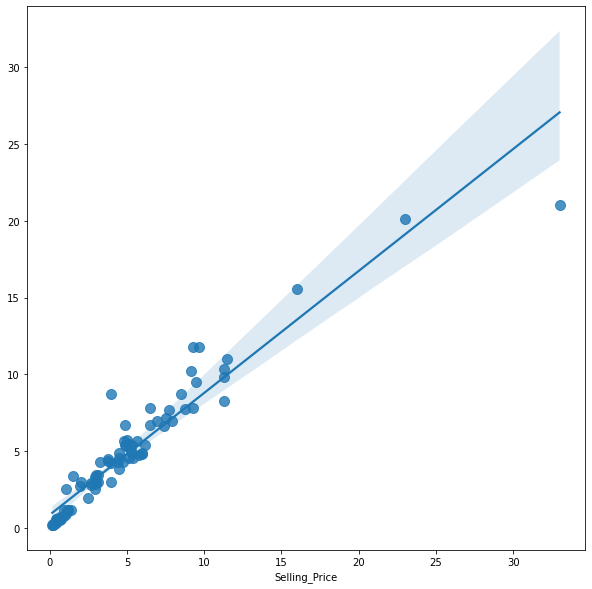

In [20]:
plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

### 11. Create a pickle file with an extension as .pkl

In [21]:
import pickle
# Saving model to disk
pickle.dump(model_RFR, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))

### 12. Create new folder/new project in visual studio/pycharm that should contain the "model.pkl" file *make sure you are using a virutal environment and install required packages.*

### a) Create a basic HTML form for the frontend

Create a file **index.html** in the templates folder and copy the following code.

### b) Create app.py file and write the predict function

### 13. Deploy your app on Heroku. (write commands for deployment)

#### Above we performed the following steps:
- Created a newfolder/new project in vscode/pycharm.
- Created virtual environment and installed the requirement packages.
- Created templates, static, app.py (once the app is running in your local machine, lets proceed with deployment)


#### Follow the below steps to deploy your application on heroku
- First We need login to heroku and create a heroku app.
    - <font color=blue>**heroku login**</font> (then login to heroku with your the id and password).
    
    
- Create a heroku app
    - <font color=blue>**heroku create nameofyourapp**</font> (go back to heroku dashboard we can see a app created with given name)
    
    
- Create a Procfile (Procfile is a mechanism for declaring what commands are run by your application’s dynos on the Heroku platform.)
    - <font color=blue>**echo web: >Procfile**</font> (creates a procfile)
    - `web: gunicorn  app:app`(paste this in the procfile)
                         
                  
- Create a runtime.txt file (need to tell what type of python need to be used)
   - `python-3.10.5` (pass your version of the python in the file)
       
       
- Create a requirements.txt file
   - <font color=blue>**pip freeze >requirements.txt**</font>
       
       
- initialize a git repository <font color=blue>**git init**</font>


- Push your code to git repository
    - <font color=blue>**git add .**</font>
    - <font color=blue>**git commit -m 'Intial Commit'**</font>
    
    
- Push the code from your local repository's main branch to your heroku remote. 
    - <font color=blue>**heroku git:remote -a nameofyourapp**</font> (this will set git remote heroku)
    - <font color=blue>**git push heroku master**</font>
    

### 14. Paste the URL of the heroku application below, and while submitting the solution submit this notebook along with the source code.

https://used-car-selling-price-predict.herokuapp.com/

### Happy Learning :)